# Introduction
The Titanic dataset provides a rich set of features for exploring various data analysis techniques. This dataset, containing information about the passengers on the Titanic, is widely used for educational purposes and is a great starting point for practicing exploratory data analysis (EDA), data visualization, and machine learning techniques.

<font color = 'green'>
Content:
    
1. [Data Loading and Checking](#1)
    * [Data Description](#2)
    * [Reducing unnecessary values ​​and digitizing categorical data](#3)
    * [Detection Outlier](#4)
1. [Data Visualiton](#5)
1. [Data Filling](#6)
1. [Encoding and Scaling for ML and DL](#7)
1. [Machine Learning and Deep Learning Methods](#8)
    
    
    



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id ="1"></a>
# Data Loading and Checking

In [2]:
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


<a id ="2"></a>
# Data Description

1.  PassengerId: Unique id number to each passenger

1.  Survived: whether the passenger survive (1) or died (0)

1.  Pclass: Passenger class number

1.  Name: Name of passanger

1.  Sex: Gender of passenger

1.  Age: Age of passenger

1.  SibSp: The sibling/spouses number passanger has

1.  Parch: The parents/children number passanger has 

1.  Ticket: Ticket number

1.  Fare: Amount of money spent on ticket

1.  Cabin: Cabin number

1.  Embarked: Port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [9]:
#The output of the test data here, that is, the 'survived' column in the gender_submission dataset, should be merged with the test data.
#We should create a new dataset by merging these two and then combine this merged data with the training data so that our model can be trained better.
#We will separate the data using train_test_split anyway.
#If we had not merged the data, the train and test data would look like this:


""""
X_train = train.drop(columns="survived",inplace = True)
Y_train = train["survived"]
X_test = test
Y_test = gender_submission
"""
# However, when we evaluate the data this way, we may encounter issues when we need to drop columns or when applying ML and DL models

'"\nX_train = train.drop(columns="survived",inplace = True)\nY_train = train["survived"]\nX_test = test\nY_test = gender_submission\n'

In [10]:
merged_df = pd.merge(test, gender_submission, on='PassengerId', how='inner')  # 'how' parametresi: 'inner', 'outer', 'left', 'right'
merged_df2 = pd.concat([train, merged_df], axis=0)
data = merged_df2.copy()

<a id ="3"></a>
## Reducing unnecessary values ​​and digitizing categorical data

In [11]:
#To use the 'Sex' column, it needs to be in numerical format. Therefore, we need to convert the categorical values to numerical values.
data.Sex = [1 if each == "male"  else 0 for each in data.Sex]


In [12]:
data.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)

for i in data.columns:
    print(data[i].value_counts(),"\n\n")

Survived
0    815
1    494
Name: count, dtype: int64 


Pclass
3    709
1    323
2    277
Name: count, dtype: int64 


Sex
1    843
0    466
Name: count, dtype: int64 


Age
24.0    47
22.0    43
21.0    41
30.0    40
18.0    39
        ..
23.5     1
70.5     1
55.5     1
20.5     1
38.5     1
Name: count, Length: 98, dtype: int64 


SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64 


Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64 


Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64 


Embarked
S    914
C    270
Q    123
Name: count, dtype: int64 




In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 92.0+ KB


In [14]:
data.dropna(subset=['Embarked',"Fare"], inplace=True)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1306 non-null   int64  
 1   Pclass    1306 non-null   int64  
 2   Sex       1306 non-null   int64  
 3   Age       1043 non-null   float64
 4   SibSp     1306 non-null   int64  
 5   Parch     1306 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Embarked  1306 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 91.8+ KB


<a id ="4"></a>
# Detection Outlier

In [16]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers


In [17]:
category = ["Age","Fare"]
data.loc[detect_outliers(data,category)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


<a id ="5"></a>
# Data Visulation

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1306 non-null   int64  
 1   Pclass    1306 non-null   int64  
 2   Sex       1306 non-null   int64  
 3   Age       1043 non-null   float64
 4   SibSp     1306 non-null   int64  
 5   Parch     1306 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Embarked  1306 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 124.1+ KB


<Axes: >

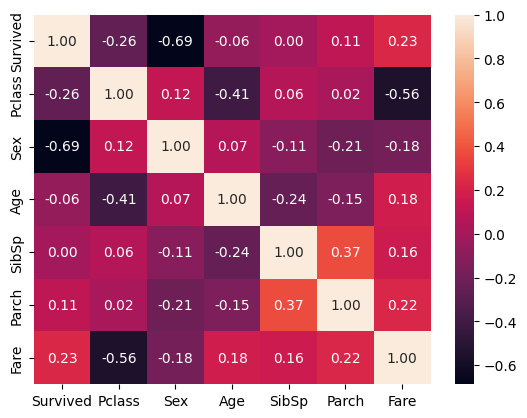

In [19]:
a = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
sns.heatmap(data[a].corr(),annot= True ,fmt=".2f")

In [20]:
non_categ_variables = ["Age","Fare"]
categ_variables = ['Survived', 'Pclass', 'Sex',  'SibSp', 'Parch',"Embarked"] #bar plot

In [21]:
data[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,0,0.825431
1,1,0.129454


In [22]:
data[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.573209
1,2,0.422383
2,3,0.269774


In [23]:
data[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.625000
1,1,0.547059
2,2,0.530973
7,9,0.500000
4,4,0.333333
0,0,0.330330
5,5,0.166667
6,6,0.000000


In [24]:
data[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.520376
2,2,0.452381
0,0,0.333333
3,3,0.250000
4,4,0.181818
5,5,0.166667
6,8,0.111111


In [25]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = data[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

In [26]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

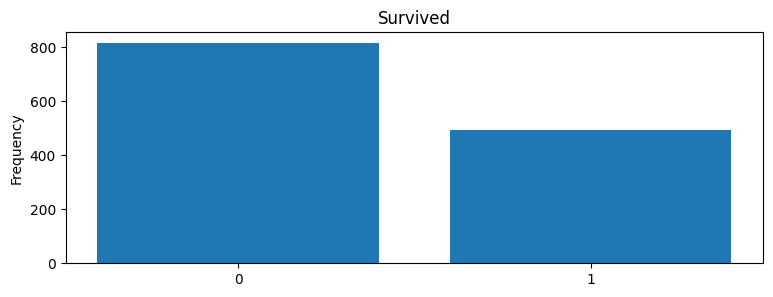

Survived: 
 Survived
0    814
1    492
Name: count, dtype: int64


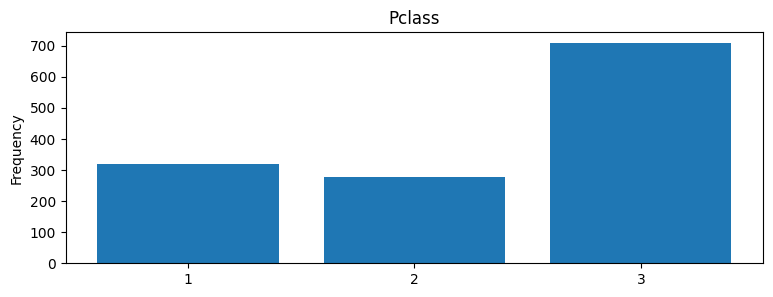

Pclass: 
 Pclass
3    708
1    321
2    277
Name: count, dtype: int64


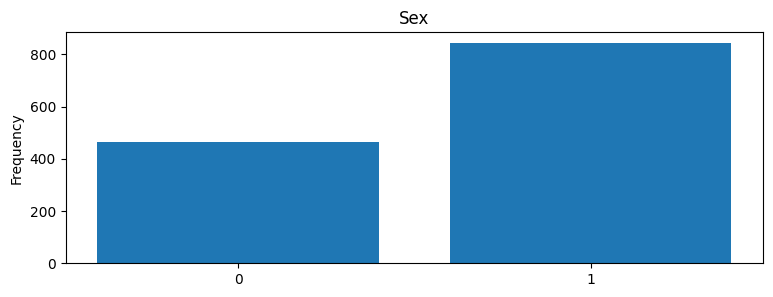

Sex: 
 Sex
1    842
0    464
Name: count, dtype: int64


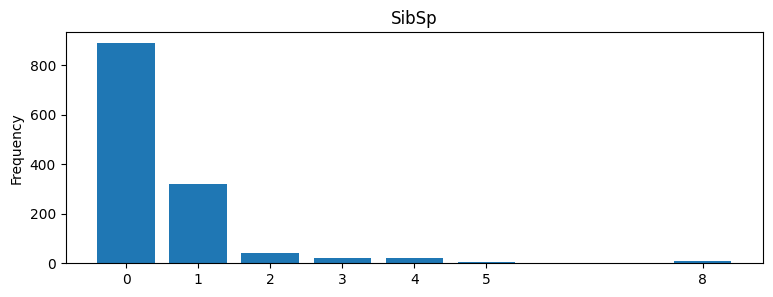

SibSp: 
 SibSp
0    888
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64


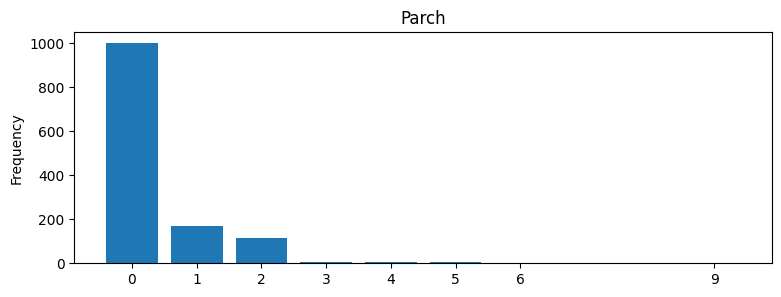

Parch: 
 Parch
0    999
1    170
2    113
3      8
5      6
4      6
6      2
9      2
Name: count, dtype: int64


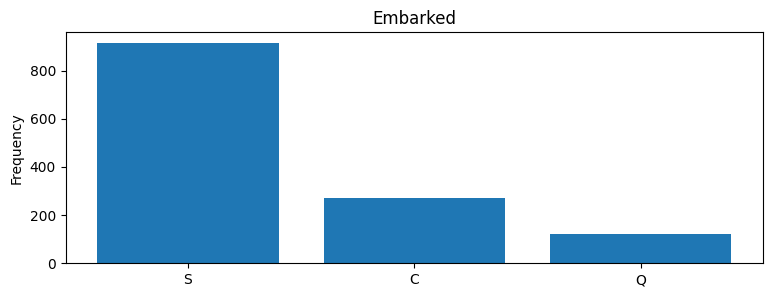

Embarked: 
 Embarked
S    913
C    270
Q    123
Name: count, dtype: int64


In [27]:
for n in categ_variables:
    bar_plot(n)

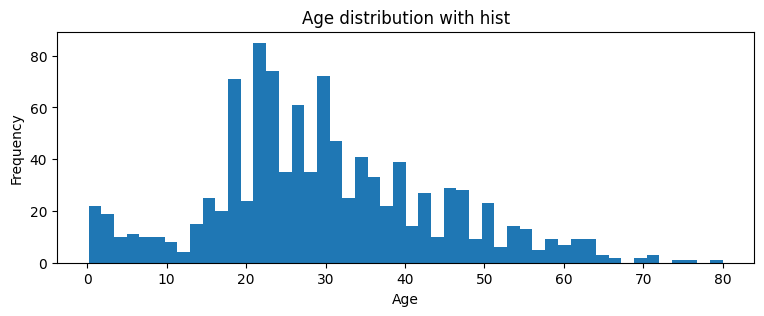

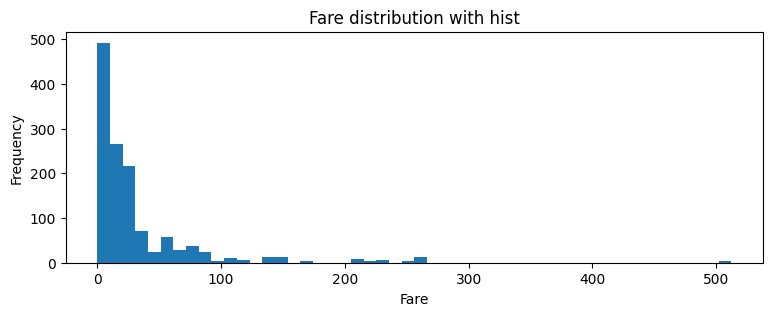

In [28]:
for n in non_categ_variables:
    plot_hist(n)

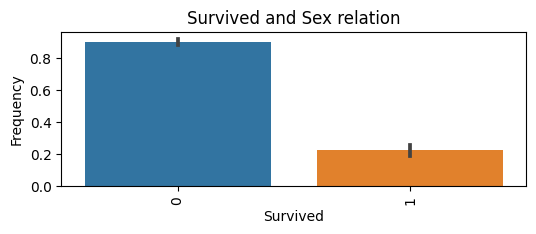

In [29]:
plt.figure(figsize = (6,2))
sns.barplot(x=data["Survived"],y=data["Sex"])
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.title("Survived and Sex relation")
plt.show()

<Axes: xlabel='Survived', ylabel='SibSp'>

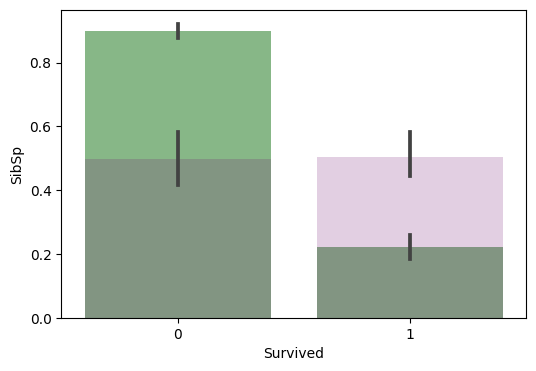

In [30]:
f,ax = plt.subplots(figsize = (6,4))
sns.barplot(data = data,x="Survived",y="Sex",alpha=0.5,color="green")
sns.barplot(data = data,x="Survived",y="SibSp",alpha=0.2,color="purple")

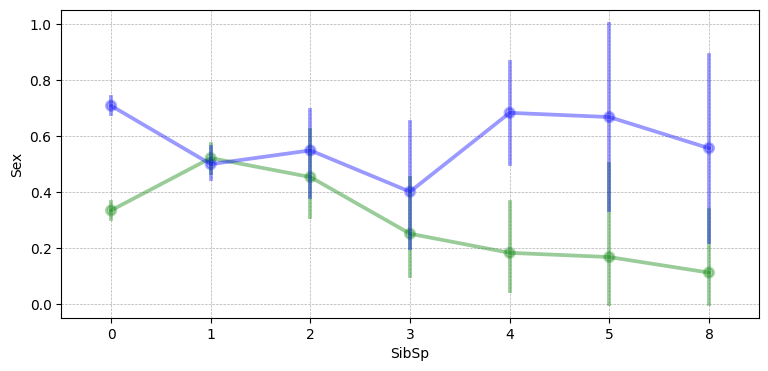

In [31]:

f, ax = plt.subplots(figsize=(9, 4))
pointplot1 = sns.pointplot(data=data, x="SibSp", y="Survived", color="green")
pointplot2 = sns.pointplot(data=data, x="SibSp", y="Sex", color="blue")

# Adjust transparency for the second pointplot
plt.setp(pointplot2.lines, alpha=0.4)
plt.setp(pointplot2.collections, alpha=0.3)  # For markers
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


Text(0.5, 1.0, 'sex')

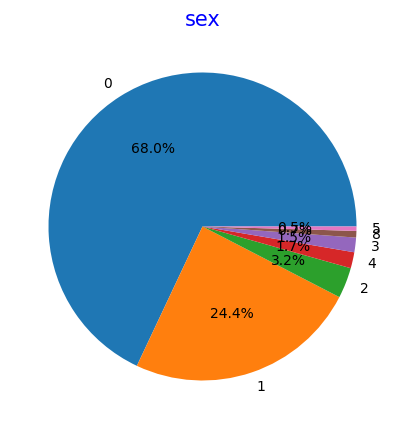

In [32]:
labels = data.SibSp.value_counts().index
sizes = data.SibSp.value_counts().values
#colors = ['grey','blue']

explode = [0] * len(sizes)  
plt.figure(figsize = (5,5))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('sex',color = 'blue',fontsize = 15)

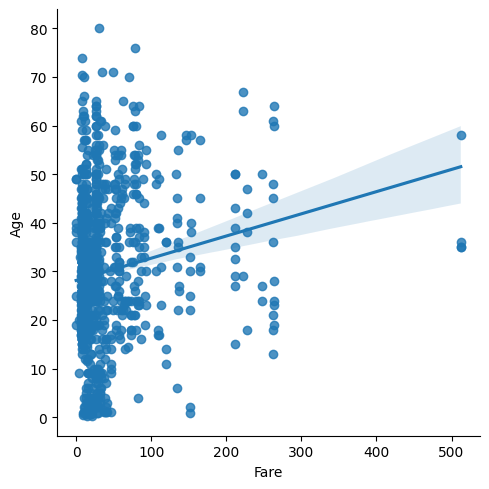

In [33]:
sns.lmplot(x="Fare", y="Age", data=data)

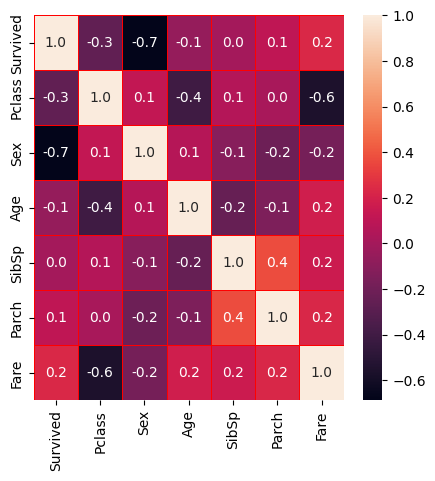

In [34]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data[a].corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

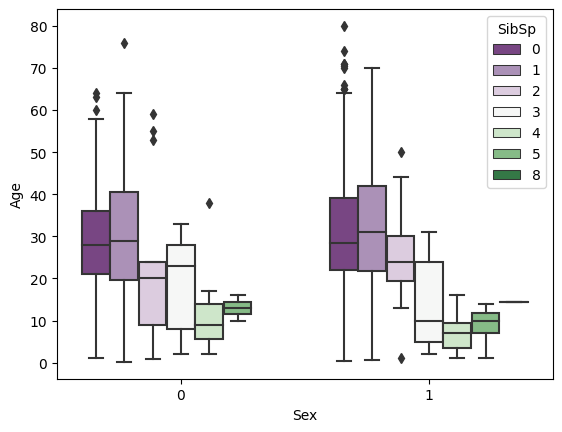

In [35]:
sns.boxplot(x="Sex", y="Age", hue="SibSp", data=data, palette="PRGn")
plt.show()

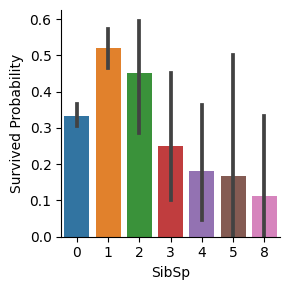

In [36]:
g = sns.catplot(x = "SibSp", y = "Survived", data = data, kind = "bar", height  = 3)
g.set_ylabels("Survived Probability")
plt.show()

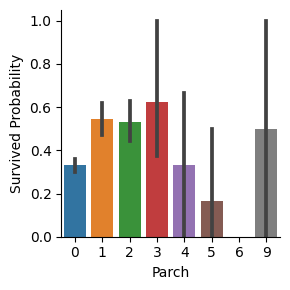

In [37]:
g = sns.catplot(x = "Parch", y = "Survived", data = data, kind = "bar", height  = 3)
g.set_ylabels("Survived Probability")
plt.show()

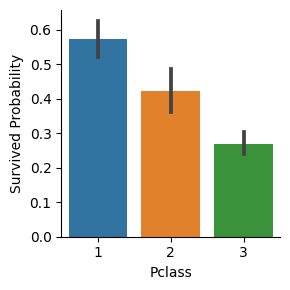

In [38]:
g = sns.catplot(x = "Pclass", y = "Survived", data = data, kind = "bar", height  = 3)
g.set_ylabels("Survived Probability")
plt.show()

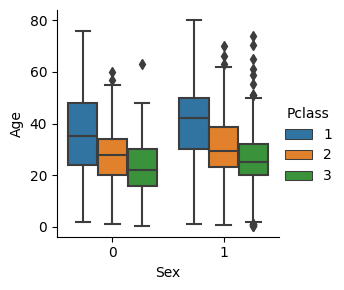

In [39]:
sns.catplot(x = "Sex", y = "Age", hue = "Pclass",data = data, kind = "box",height  = 3)
plt.show()

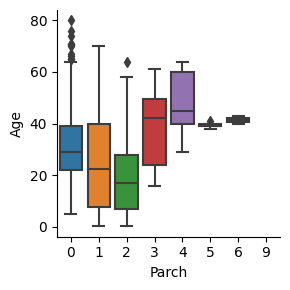

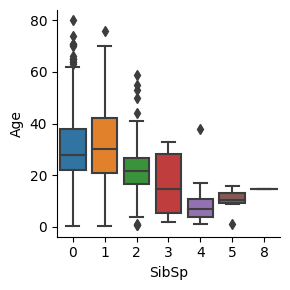

In [40]:
sns.catplot(x = "Parch", y = "Age", data = data, kind = "box",height  = 3)
sns.catplot(x = "SibSp", y = "Age", data = data, kind = "box",height  = 3)
plt.show()

<a id ="6"></a>
# Data Filling


In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


data2 = data["Age"].copy()
data_filled = data2.fillna(data2.mean())
data_filled = data_filled.values.reshape(-1, 1)  # 'values' eklemeyi unutmayın


scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(data_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(data_scaled.shape[1], activation='linear')) 

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(data_scaled, data_scaled, epochs=100, batch_size=256, validation_split=0.2)


pred = model.predict(data_scaled)
pred = pred.flatten()
data["Age"] = pred

2024-07-19 17:31:29.815560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 17:31:29.815696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 17:31:29.995556: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.7552 - val_loss: 0.5610
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5400 - val_loss: 0.4102
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4126 - val_loss: 0.2836
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2655 - val_loss: 0.1882
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1773 - val_loss: 0.1220
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1223 - val_loss: 0.0718
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0649 - val_loss: 0.0318
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0283 - val_loss: 0.0160
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - val_loss: 0.0095
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0082 - val_loss: 0.0055
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 13/100

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1306 non-null   int64  
 1   Pclass    1306 non-null   int64  
 2   Sex       1306 non-null   int64  
 3   Age       1306 non-null   float32
 4   SibSp     1306 non-null   int64  
 5   Parch     1306 non-null   int64  
 6   Fare      1306 non-null   float64
 7   Embarked  1306 non-null   object 
dtypes: float32(1), float64(1), int64(5), object(1)
memory usage: 119.0+ KB


In [43]:
data2 = data.copy()

<a id ="7"></a>
# Encoding and Scaling for ML and DL

In [44]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop=None: Hiçbir kategori düşürme, tüm kategorileri encode et
encoded_embarked = encoder.fit_transform(data[['Embarked']])
encoded_embarked_df = pd.DataFrame(encoded_embarked, columns=encoder.get_feature_names_out(['Embarked']))

data = data.drop(columns=['Embarked'])
data = data.reset_index(drop=True)
encoded_embarked_df = encoded_embarked_df.reset_index(drop=True)
data = pd.concat([data, encoded_embarked_df], axis=1)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_fare = data['Fare'].values.reshape(-1, 1)
data['Fare'] = scaler.fit_transform(data_fare)

<a id ="8"></a>
# Machine Learning and Deep Learning Methods

In [46]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

for i in data.columns:
    
    x = data.drop(columns = i)
    y = data[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print("Label Name: {}".format(i))
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print("\n")

Label Name: Survived
Mean Squared Error: 0.10132632426516736
R-squared: 0.5767134735358965


Label Name: Pclass
Mean Squared Error: 0.3644678829280475
R-squared: 0.507169637433017


Label Name: Sex
Mean Squared Error: 0.10441019255311082
R-squared: 0.5540608973608923


Label Name: Age
Mean Squared Error: 0.7989869567048259
R-squared: 0.18700758886290547


Label Name: SibSp
Mean Squared Error: 1.2008299220451912
R-squared: 0.21953331721642477


Label Name: Parch
Mean Squared Error: 0.29421216437791914
R-squared: 0.36340741334726945


Label Name: Fare
Mean Squared Error: 0.41342563392530013
R-squared: 0.49033244862047987


Label Name: Embarked_C
Mean Squared Error: 2.6609000953781268e-31
R-squared: 1.0


Label Name: Embarked_Q
Mean Squared Error: 3.6201602252359766e-31
R-squared: 1.0


Label Name: Embarked_S
Mean Squared Error: 4.31102511032487e-30
R-squared: 1.0




In [47]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

for i in data.columns:
    
    x = data.drop(columns = i)
    y = data[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred_linear = model.predict(x_test)
    
    poly = PolynomialFeatures(degree=2)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.fit_transform(x_test)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly_train,y_train)
    y_pred_poly = model_poly.predict(x_poly_test)

    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f'Label Name: {i}')
    print(f'Linear Regression - Mean Squared Error: {mse_linear}')
    print(f'Linear Regression - R-squared: {r2_linear}')
    print(f'Polynomial Regression - Mean Squared Error: {mse_poly}')
    print(f'Polynomial Regression - R-squared: {r2_poly}')
    print("\n")


Label Name: Survived
Linear Regression - Mean Squared Error: 0.10132632426516736
Linear Regression - R-squared: 0.5767134735358965
Polynomial Regression - Mean Squared Error: 0.10254729683214174
Polynomial Regression - R-squared: 0.5716129111644633


Label Name: Pclass
Linear Regression - Mean Squared Error: 0.3644678829280475
Linear Regression - R-squared: 0.507169637433017
Polynomial Regression - Mean Squared Error: 0.26250523662075953
Polynomial Regression - R-squared: 0.6450426580794757


Label Name: Sex
Linear Regression - Mean Squared Error: 0.10441019255311082
Linear Regression - R-squared: 0.5540608973608923
Polynomial Regression - Mean Squared Error: 0.10258638640473566
Polynomial Regression - R-squared: 0.561850428797494


Label Name: Age
Linear Regression - Mean Squared Error: 0.7989869567048259
Linear Regression - R-squared: 0.18700758886290547
Polynomial Regression - Mean Squared Error: 0.7863378871072304
Polynomial Regression - R-squared: 0.19987838419253345


Label Name:

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
category2= ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']
for i in category2:
    
    y = data[i]
    x = data.drop(columns = i)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {i}')
    print(f'Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))
    print("\n\n")


Accuracy: Survived
Accuracy: 0.8664122137404581
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       158
           1       0.86      0.79      0.82       104

    accuracy                           0.87       262
   macro avg       0.87      0.85      0.86       262
weighted avg       0.87      0.87      0.87       262




Accuracy: Pclass
Accuracy: 0.8091603053435115
              precision    recall  f1-score   support

           1       0.94      0.89      0.91        71
           2       0.52      0.24      0.33        49
           3       0.80      0.96      0.87       142

    accuracy                           0.81       262
   macro avg       0.75      0.70      0.71       262
weighted avg       0.78      0.81      0.78       262




Accuracy: Sex
Accuracy: 0.8664122137404581
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.92      0.87      0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

Accuracy: Embarked_Q
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       233
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262




Accuracy: Embarked_S
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        88
         1.0       1.00      1.00      1.00       174

    accuracy                           1.00       262
   macro avg       1.00      1.00      1.00       262
weighted avg       1.00      1.00      1.00       262






In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

category1= ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']

for col in category1:
    print(f"*** {col} KNN Regression for Column ***")
    
    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")



*** Survived KNN Regression for Column ***
RMSE: 0.36256086617199784
R2 Score: 0.45087147030184993


*** Pclass KNN Regression for Column ***
RMSE: 0.4
R2 Score: 0.7836493647197873


*** Sex KNN Regression for Column ***
RMSE: 0.3555449531922201
R2 Score: 0.4600895968143355


*** Age KNN Regression for Column ***
RMSE: 0.905434250831604
R2 Score: 0.16581828663305898


*** SibSp KNN Regression for Column ***
RMSE: 0.6840606196074365
R2 Score: 0.6958680502954099


*** Parch KNN Regression for Column ***
RMSE: 0.5140766568910763
R2 Score: 0.42818345153664306


*** Fare KNN Regression for Column ***
RMSE: 0.5647847634337343
R2 Score: 0.6067619557574846


*** Embarked_C KNN Regression for Column ***
RMSE: 0.16157620563996306
R2 Score: 0.8503732153293813


*** Embarked_Q KNN Regression for Column ***
RMSE: 0.0873704056661038
R2 Score: 0.9224507917714962


*** Embarked_S KNN Regression for Column ***
RMSE: 0.16760549827924834
R2 Score: 0.8740647857889237




In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


category1= ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']

for col in category1:
    print(f"*** {col} SVM Regression for Column ***")
    
    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = SVR(kernel='linear') 
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE or MSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")
# the best result was linear kernel, the worst was sigmoid sorting 1 - linear 2 -rbf 3 poly 4 sigmoid

*** Survived SVM Regression for Column ***
RMSE or MSE: 0.33736836418572363
R2 Score: 0.524532466620093


*** Pclass SVM Regression for Column ***
RMSE or MSE: 0.6110735031985272
R2 Score: 0.495077065668979


*** Sex SVM Regression for Column ***
RMSE or MSE: 0.33737505286249
R2 Score: 0.513863096781786


*** Age SVM Regression for Column ***
RMSE or MSE: 0.9039981538210523
R2 Score: 0.1684624047904928


*** SibSp SVM Regression for Column ***
RMSE or MSE: 1.219740251508726
R2 Score: 0.033042071245837135


*** Parch SVM Regression for Column ***
RMSE or MSE: 0.5777724933058798
R2 Score: 0.27770488787359604


*** Fare SVM Regression for Column ***
RMSE or MSE: 0.7118044450085631
R2 Score: 0.3753870631450298


*** Embarked_C SVM Regression for Column ***
RMSE or MSE: 0.09990292597310702
R2 Score: 0.9427980348203077


*** Embarked_Q SVM Regression for Column ***
RMSE or MSE: 0.09971367863396816
R2 Score: 0.8989914490661581


*** Embarked_S SVM Regression for Column ***
RMSE or MSE: 0.0998

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report



for col in category2:
    print(f"*** {col} Naive Bayes for column  ***")
    
    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = GaussianNB() 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE or MSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")


*** Survived Naive Bayes for column  ***
RMSE or MSE: 0.4098035276784595
R2 Score: 0.298442064264849


*** Pclass Naive Bayes for column  ***
RMSE or MSE: 0.7541235244151556
R2 Score: 0.23100561410420573


*** Sex Naive Bayes for column  ***
RMSE or MSE: 0.4051199049720714
R2 Score: 0.2990293678446987


*** SibSp Naive Bayes for column  ***
RMSE or MSE: 2.3132542095861273
R2 Score: -2.477920012119375


*** Parch Naive Bayes for column  ***
RMSE or MSE: 3.1743244758314475
R2 Score: -20.80236406619385


*** Embarked_C Naive Bayes for column  ***
RMSE or MSE: 0.0
R2 Score: 1.0


*** Embarked_Q Naive Bayes for column  ***
RMSE or MSE: 0.06178020632152155
R2 Score: 0.9612253958857481


*** Embarked_S Naive Bayes for column  ***
RMSE or MSE: 0.0
R2 Score: 1.0




In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report



for col in category2:
    print(f"*** {col} DecisionTreeClassifier for columnr  ***")
    
    
    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
    
   
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE or MSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")


*** Survived DecisionTreeClassifier for columnr  ***
RMSE or MSE: 0.40406101782088427
R2 Score: 0.3290543431750108


*** Pclass DecisionTreeClassifier for columnr  ***
RMSE or MSE: 0.22587697572631282
R2 Score: 0.9320294076848384


*** Sex DecisionTreeClassifier for columnr  ***
RMSE or MSE: 0.4225771273642583
R2 Score: 0.254671881790526


*** SibSp DecisionTreeClassifier for columnr  ***
RMSE or MSE: 0.7284313590846836
R2 Score: 0.6407915836960545


*** Parch DecisionTreeClassifier for columnr  ***
RMSE or MSE: 0.8081220356417685
R2 Score: -0.3260042283298099


*** Embarked_C DecisionTreeClassifier for columnr  ***
RMSE or MSE: 0.0
R2 Score: 1.0


*** Embarked_Q DecisionTreeClassifier for columnr  ***
RMSE or MSE: 0.0
R2 Score: 1.0


*** Embarked_S DecisionTreeClassifier for columnr  ***
RMSE or MSE: 0.0
R2 Score: 1.0




In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


for col in category2:
    
    print(f"*** {col} RandomForestClassifier for column ***")
    x = data.drop(columns=[col])
    y = data[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
   
    model = RandomForestClassifier(n_estimators=600, random_state=42)    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE or MSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("\n")


*** Survived RandomForestClassifier for column ***
RMSE or MSE: 0.38083876895469987
R2 Score: 0.39410905550146047


*** Pclass RandomForestClassifier for column ***
RMSE or MSE: 0.2140129125019265
R2 Score: 0.9380675662365803


*** Sex RandomForestClassifier for column ***
RMSE or MSE: 0.33269659286016645
R2 Score: 0.5272523643603781


*** SibSp RandomForestClassifier for column ***
RMSE or MSE: 0.6239494988372349
R2 Score: 0.7469701560369642


*** Parch RandomForestClassifier for column ***
RMSE or MSE: 0.6147052915176893
R2 Score: 0.1824113475177307


*** Embarked_C RandomForestClassifier for column ***
RMSE or MSE: 0.0
R2 Score: 1.0


*** Embarked_Q RandomForestClassifier for column ***
RMSE or MSE: 0.0
R2 Score: 1.0


*** Embarked_S RandomForestClassifier for column ***
RMSE or MSE: 0.0
R2 Score: 1.0




/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


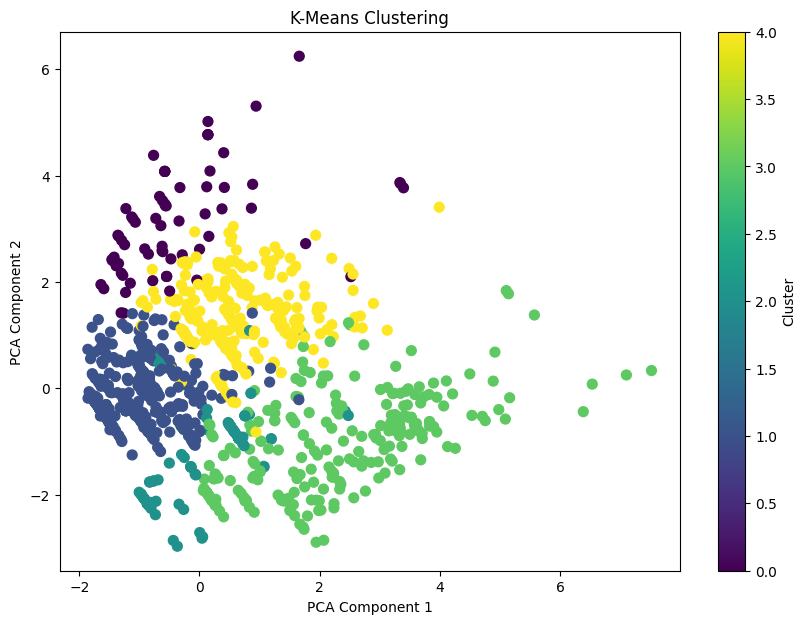

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = data.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(df_scaled)


cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels
centroids = kmeans.cluster_centers_
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()



In [55]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(columns=['Survived'])
y = data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(LeakyReLU())
model.add(Dense(64))
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dense(32))
model.add(LeakyReLU())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


optimizer = Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=120, verbose=1)
y_pred = model.predict(X_test).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.5682 - loss: 0.6791 - val_accuracy: 0.6260 - val_loss: 0.6343
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6270 - loss: 0.6290 - val_accuracy: 0.6412 - val_loss: 0.6052
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6864 - loss: 0.5773 - val_accuracy: 0.6908 - val_loss: 0.5505
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7644 - loss: 0.5267 - val_accuracy: 0.8015 - val_loss: 0.4804
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7959 - loss: 0.4779 - val_accuracy: 0.8550 - val_loss: 0.4129
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8392 - loss: 0.4436 - val_accuracy: 0.8664 - val_loss: 0.3933
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8260 - loss: 0.4618 - val_accuracy: 0.8702 - val_loss: 0.3762
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8568 - loss: 0.3953 - val_accuracy: 0.8588 - val_loss: 0.3712

In [56]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_reshaped = np.expand_dims(X_train, axis=1)
X_test_reshaped = np.expand_dims(X_test, axis=1)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, X_train.shape[1])),  # Correct shape input
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, epochs=150, batch_size=128, verbose=1)
y_pred = model.predict(X_test_reshaped).flatten()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)


Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5895 - loss: 0.6922
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6366 - loss: 0.6877
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6343 - loss: 0.6812
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6075 - loss: 0.6731
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6337 - loss: 0.6513
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6322 - loss: 0.6284
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6276 - loss: 0.6135
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6419 - loss: 0.5889
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6683 - loss: 0.5804
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7108 - loss: 0.5351 
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7364 - loss: 0.5148
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7802 - loss: 0.46

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


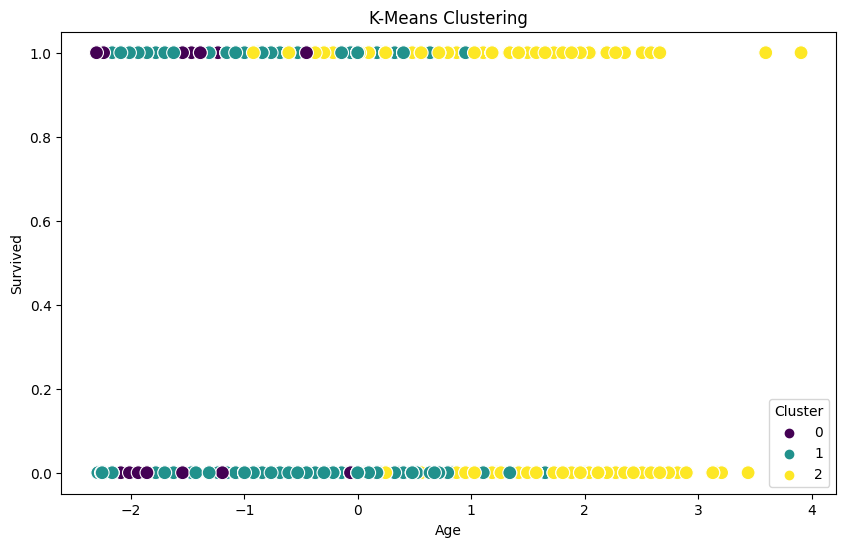

Cluster Centers:
[[ 2.6372549   0.44117647 -0.94944984  3.00980392  2.16666667  0.42744761
   0.08823529  0.05882353  0.85294118]
 [ 2.72546729  0.69626168 -0.23957491  0.24415888  0.19976636 -0.38927563
   0.14369159  0.12850467  0.72780374]
 [ 1.1408046   0.57758621  0.86915491  0.39367816  0.32183908  0.83224219
   0.39655172  0.02011494  0.58333333]]


In [57]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



X = data.drop(columns=['Survived'])
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Survived', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)


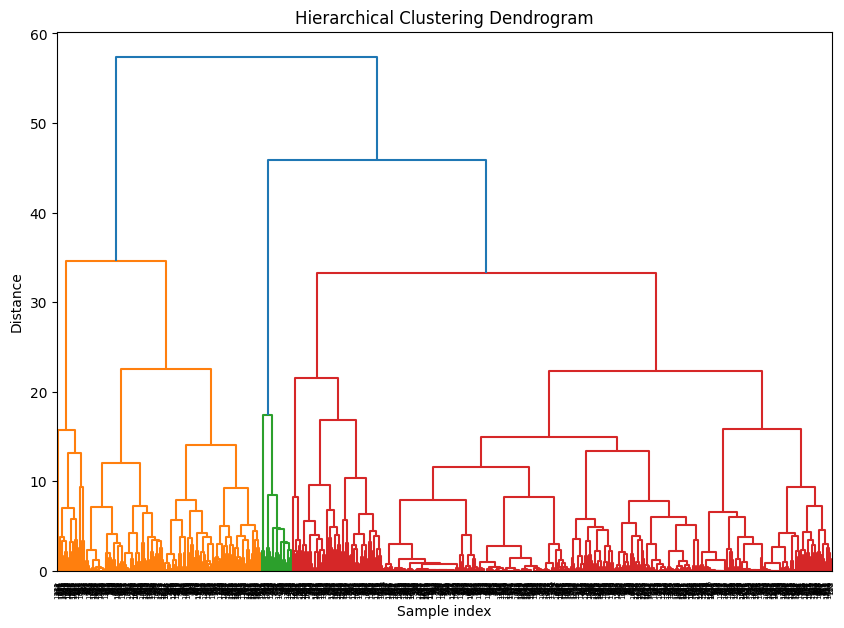

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



X = data.drop(columns=['Survived'])
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=list(data.index))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

data['Cluster'] = fcluster(linked, t=3, criterion='maxclust')
plt.figure


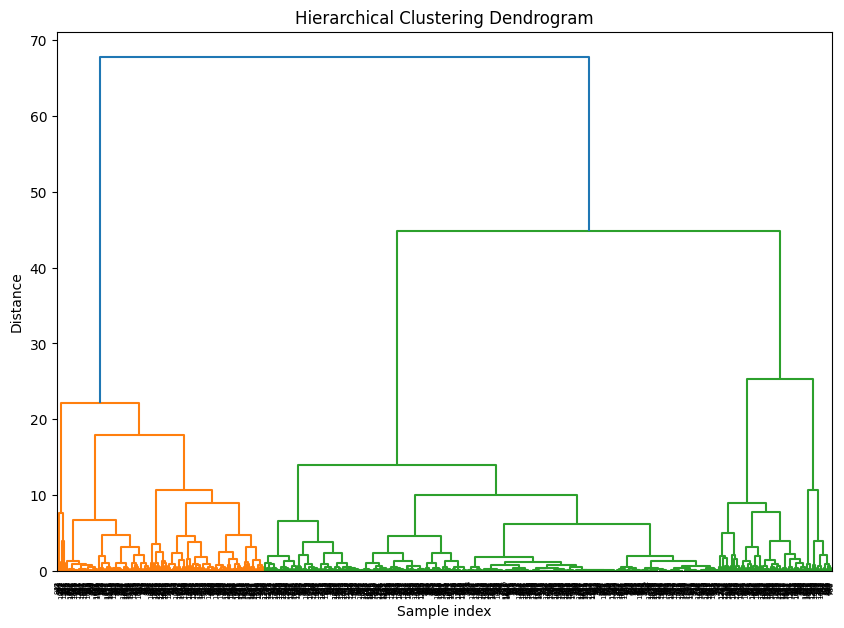

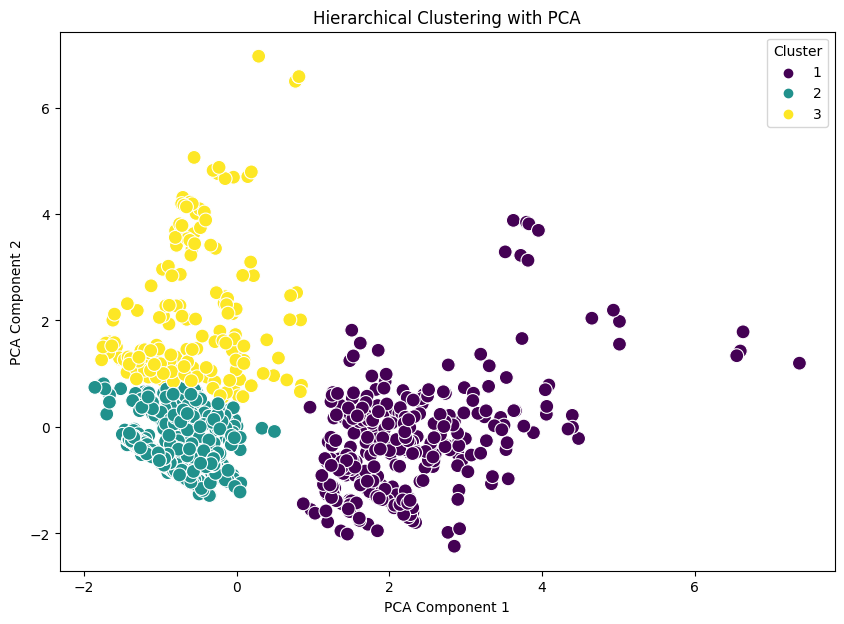

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


X = data.drop(columns=['Survived'])



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
linked = linkage(X_pca, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=list(data.index))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

df['Cluster'] = fcluster(linked, t=3, criterion='maxclust')

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
